Consider the evolution of a simple Hamiltonian into a problem-specific Hamiltonian where the optimal solution is 'encoded' in the ground state of the problem Hamiltonian $\displaystyle \hat{\mathcal{H}}_{\text{P}}$

$$\hat{\mathcal{H}}\left(s\right) = \left(1 - s\right)\gamma\hat{\mathcal{H}}_0 + s\underbrace{\left(\alpha\hat{\mathcal{H}}_{\text{A}} + \hat{\mathcal{H}}_{\text{B}}\right)}_{\hat{\mathcal{H}}_{\text{P}}},\qquad\hat{\mathcal{H}}_{\text{B}} = -\sum_{i = 1}^np_ix_i$$

for some $\displaystyle s = \frac{t}{T}$ where $T$ is the total computation time with

$$\begin{dcases}
    \quad\hat{\mathcal{H}}_0 = -\sum_i\sigma_x^i,\qquad&\left(\text{Transverse}\right)\\
    \quad\hat{\mathcal{H}}_0 = -\sum_{i < j}\sigma_x^i\sigma_x^j,\qquad&\left(\text{Mixed}\right)
\end{dcases}$$

and

$$\hat{\mathcal{H}}_{\text{A}} = \left[\sum_{j = 0}^{M - 1}2^jy_j + \left(c + 1 - 2^M\right)y_M - \sum_{i = 1}^nw_ix_i\right]^2,\qquad S\left(n\right) = O\left(n + \left\lfloor\log_2c\right\rfloor + 1\right)$$

where $\displaystyle \alpha > \max\left(p_j\right)$ and $\displaystyle M = \left\lfloor\log_2c\right\rfloor$ s.t. $2^{\ell + 1} \leq c < 2^{M + 1}$


In [2]:
from quantum_annealing_engine import Basis, Observable, Coffey, MakeGraphCoffey
import matplotlib.pyplot as plt
import numpy as np

Note that by default, H_0 will use take the form of a transverse Hamiltonian!

gamma parameter has been set to: 1.0

alpha parameter has been set to default as: 10

H_0 set as mixed!

gamma parameter has been set to: 0.5

Quantum annealing complete!

Probabilities computed!

Spectrum computed!



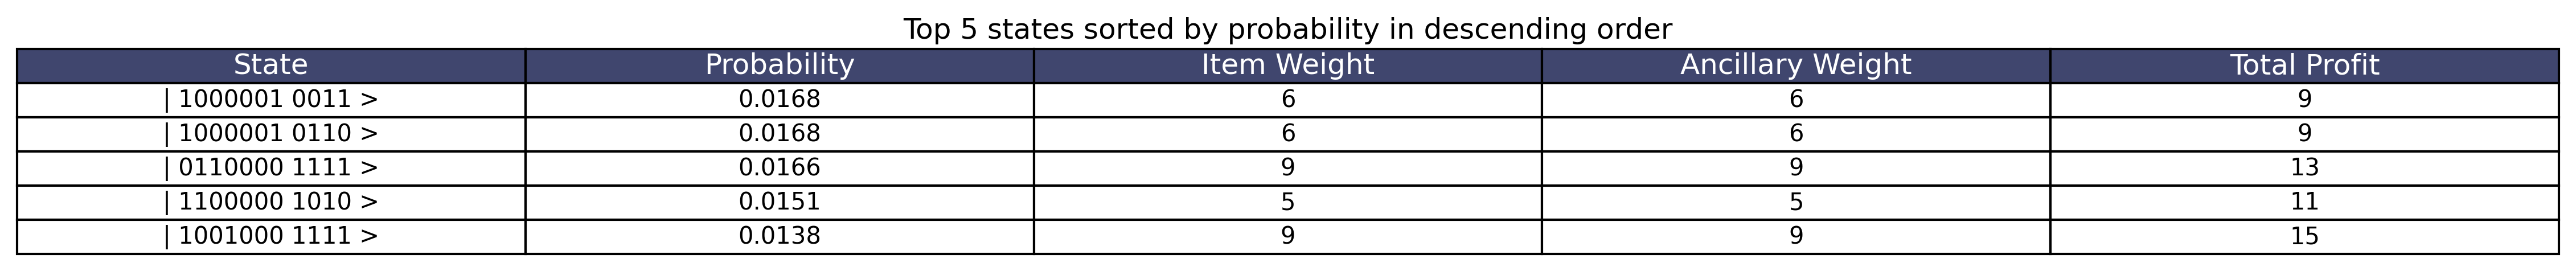

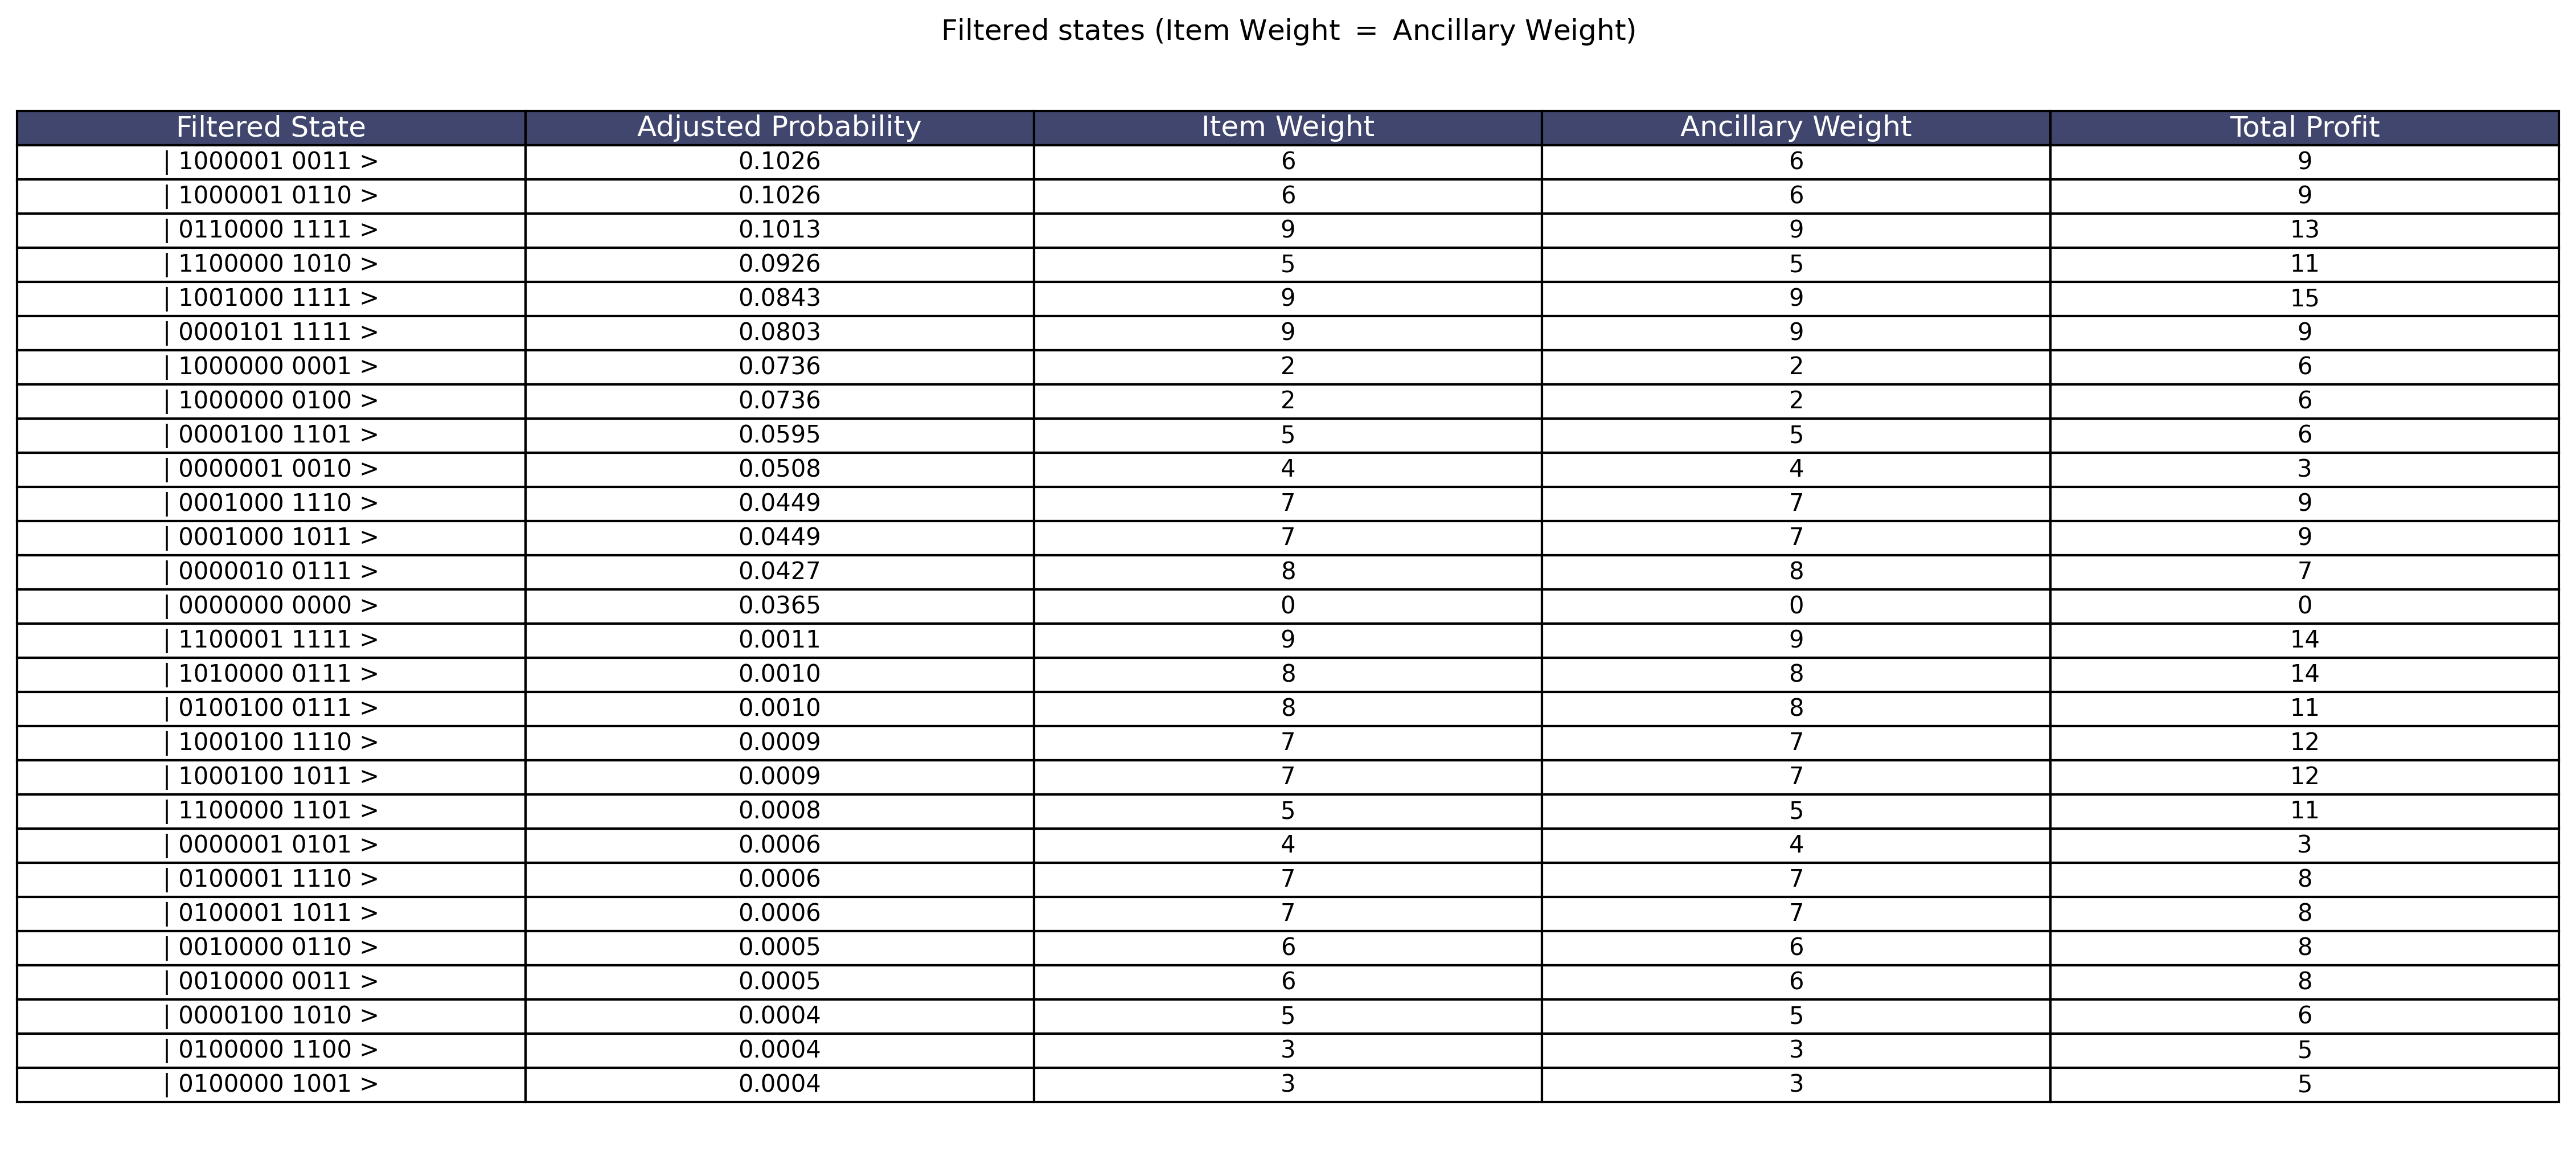

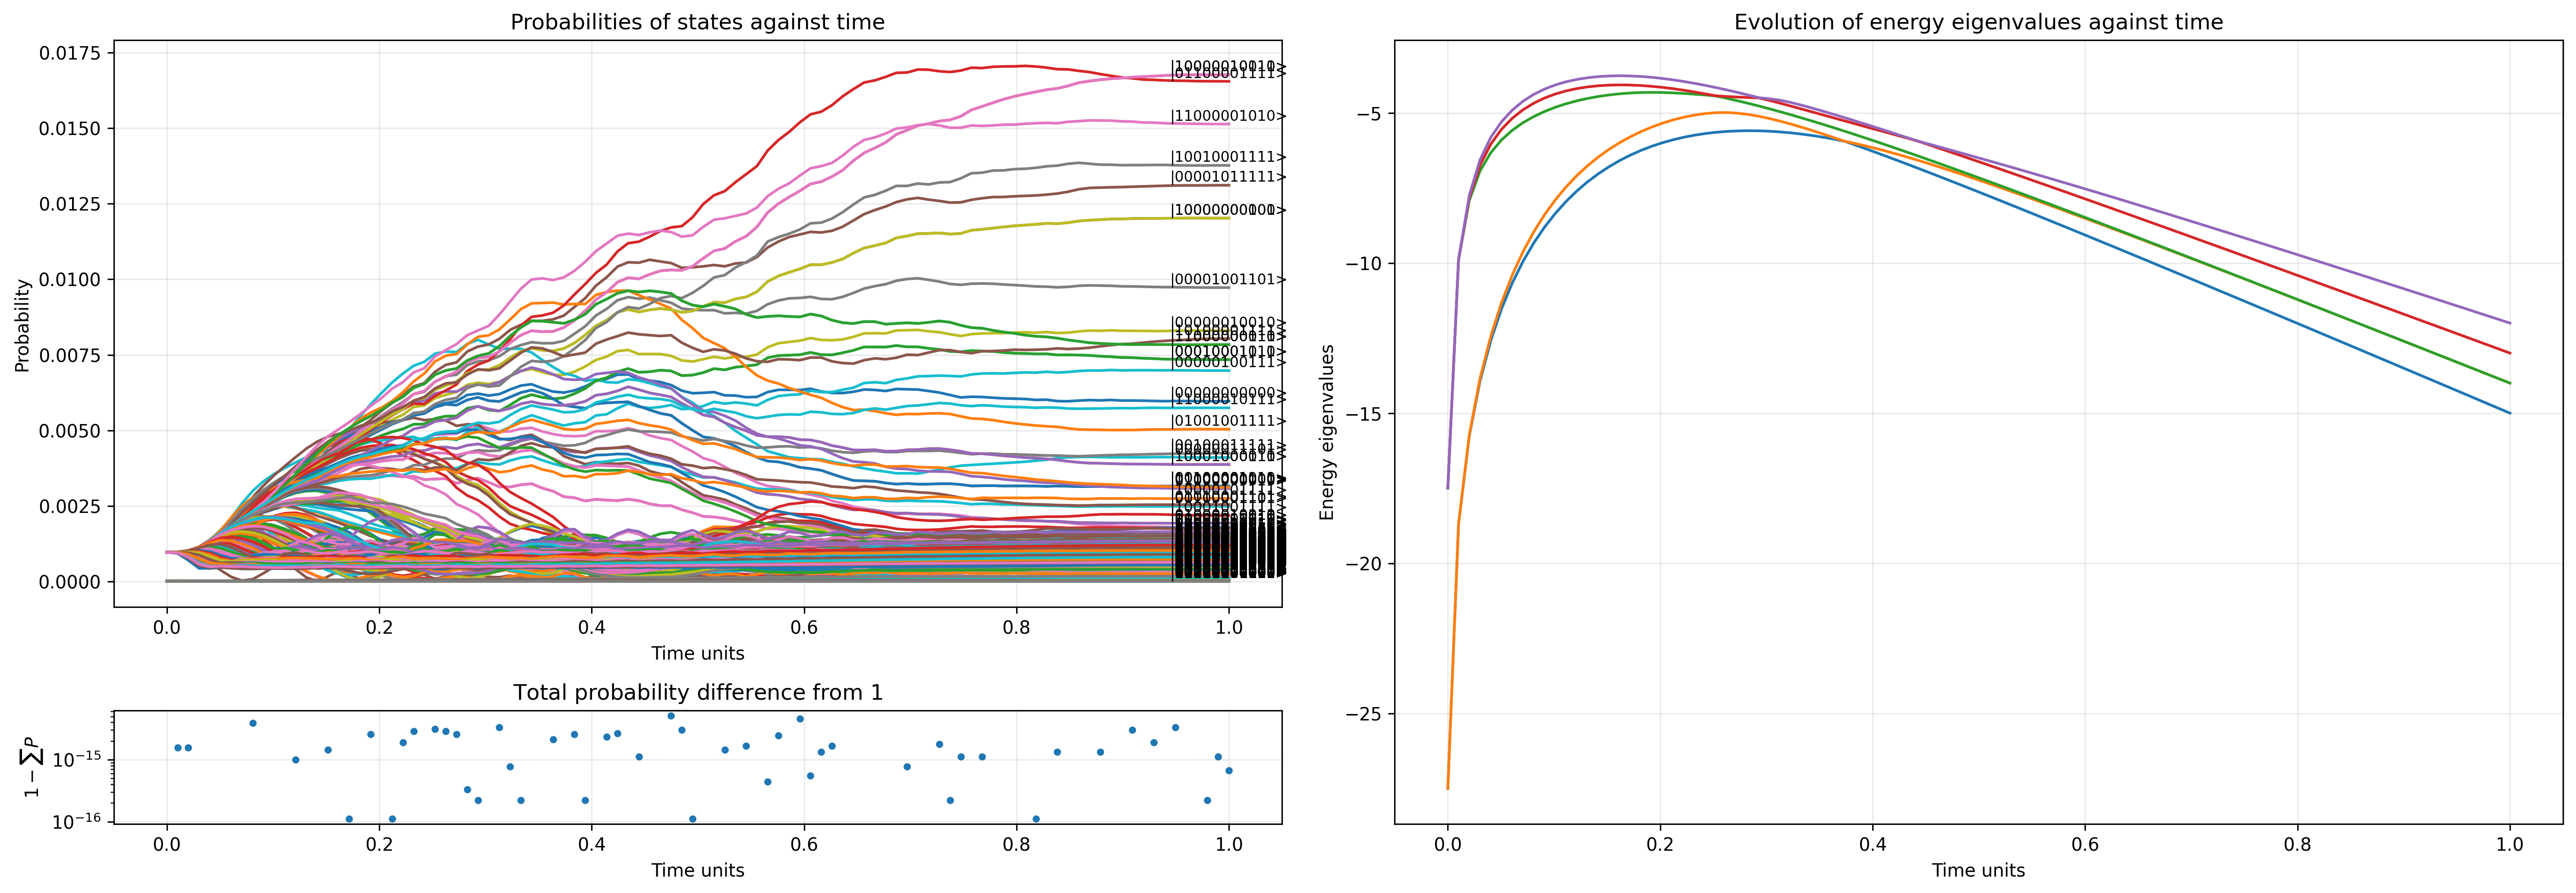

In [4]:
#   Parameters to set
# profits = np.array([10, 2])
# weights = np.array([1, 2])
# capacity = 2

# profits = np.array([8, 3, 5, 6, 9])
# weights = np.array([1, 2, 1, 3, 2])
# capacity = 7

profits = np.array([6, 5, 8, 9, 6, 7, 3])
weights = np.array([2, 3, 6, 7, 5, 8, 4])
capacity = 9

num_steps = 100
num_sub_steps = 100

sim = Coffey(profits, weights, capacity)

sim.set_H_0_state("mixed")
sim.set_gamma(0.5)
# sim.set_alpha(0)

res = sim.anneal(num_steps)
probs = sim.compute_probs(res, num_sub_steps)
spectrum = sim.compute_spectrum(num_sub_steps)

dis = MakeGraphCoffey()
dis.set_probs(probs)
dis.set_spectrum(spectrum)

dis.display_probs(sim)
dis.display_filtered_probs(sim)
dis.display_graph(sim)

In [3]:
%%capture

valid_solutions = ['1010', '1001']
# valid_solutions = ["10111111"]
# valid_solutions = ['10010001111']

simulated_probs = []
alphas = np.linspace(
    np.max(sim.get_profits()) + 1, np.max(sim.get_profits()) + 1 + 50, 5
)
for alpha in alphas:
    sim.set_alpha(alpha)
    simulated_probs.append(
        sum(
            tup[1]
            for tup in [
                (format(idx, f"0{sim.get_total_qubits()}b"), prob)
                for idx, prob in enumerate(
                    sim.compute_probs(sim.anneal(num_steps), num_sub_steps)[-1]
                )
            ]
            if tup[0] in valid_solutions
        )
    )

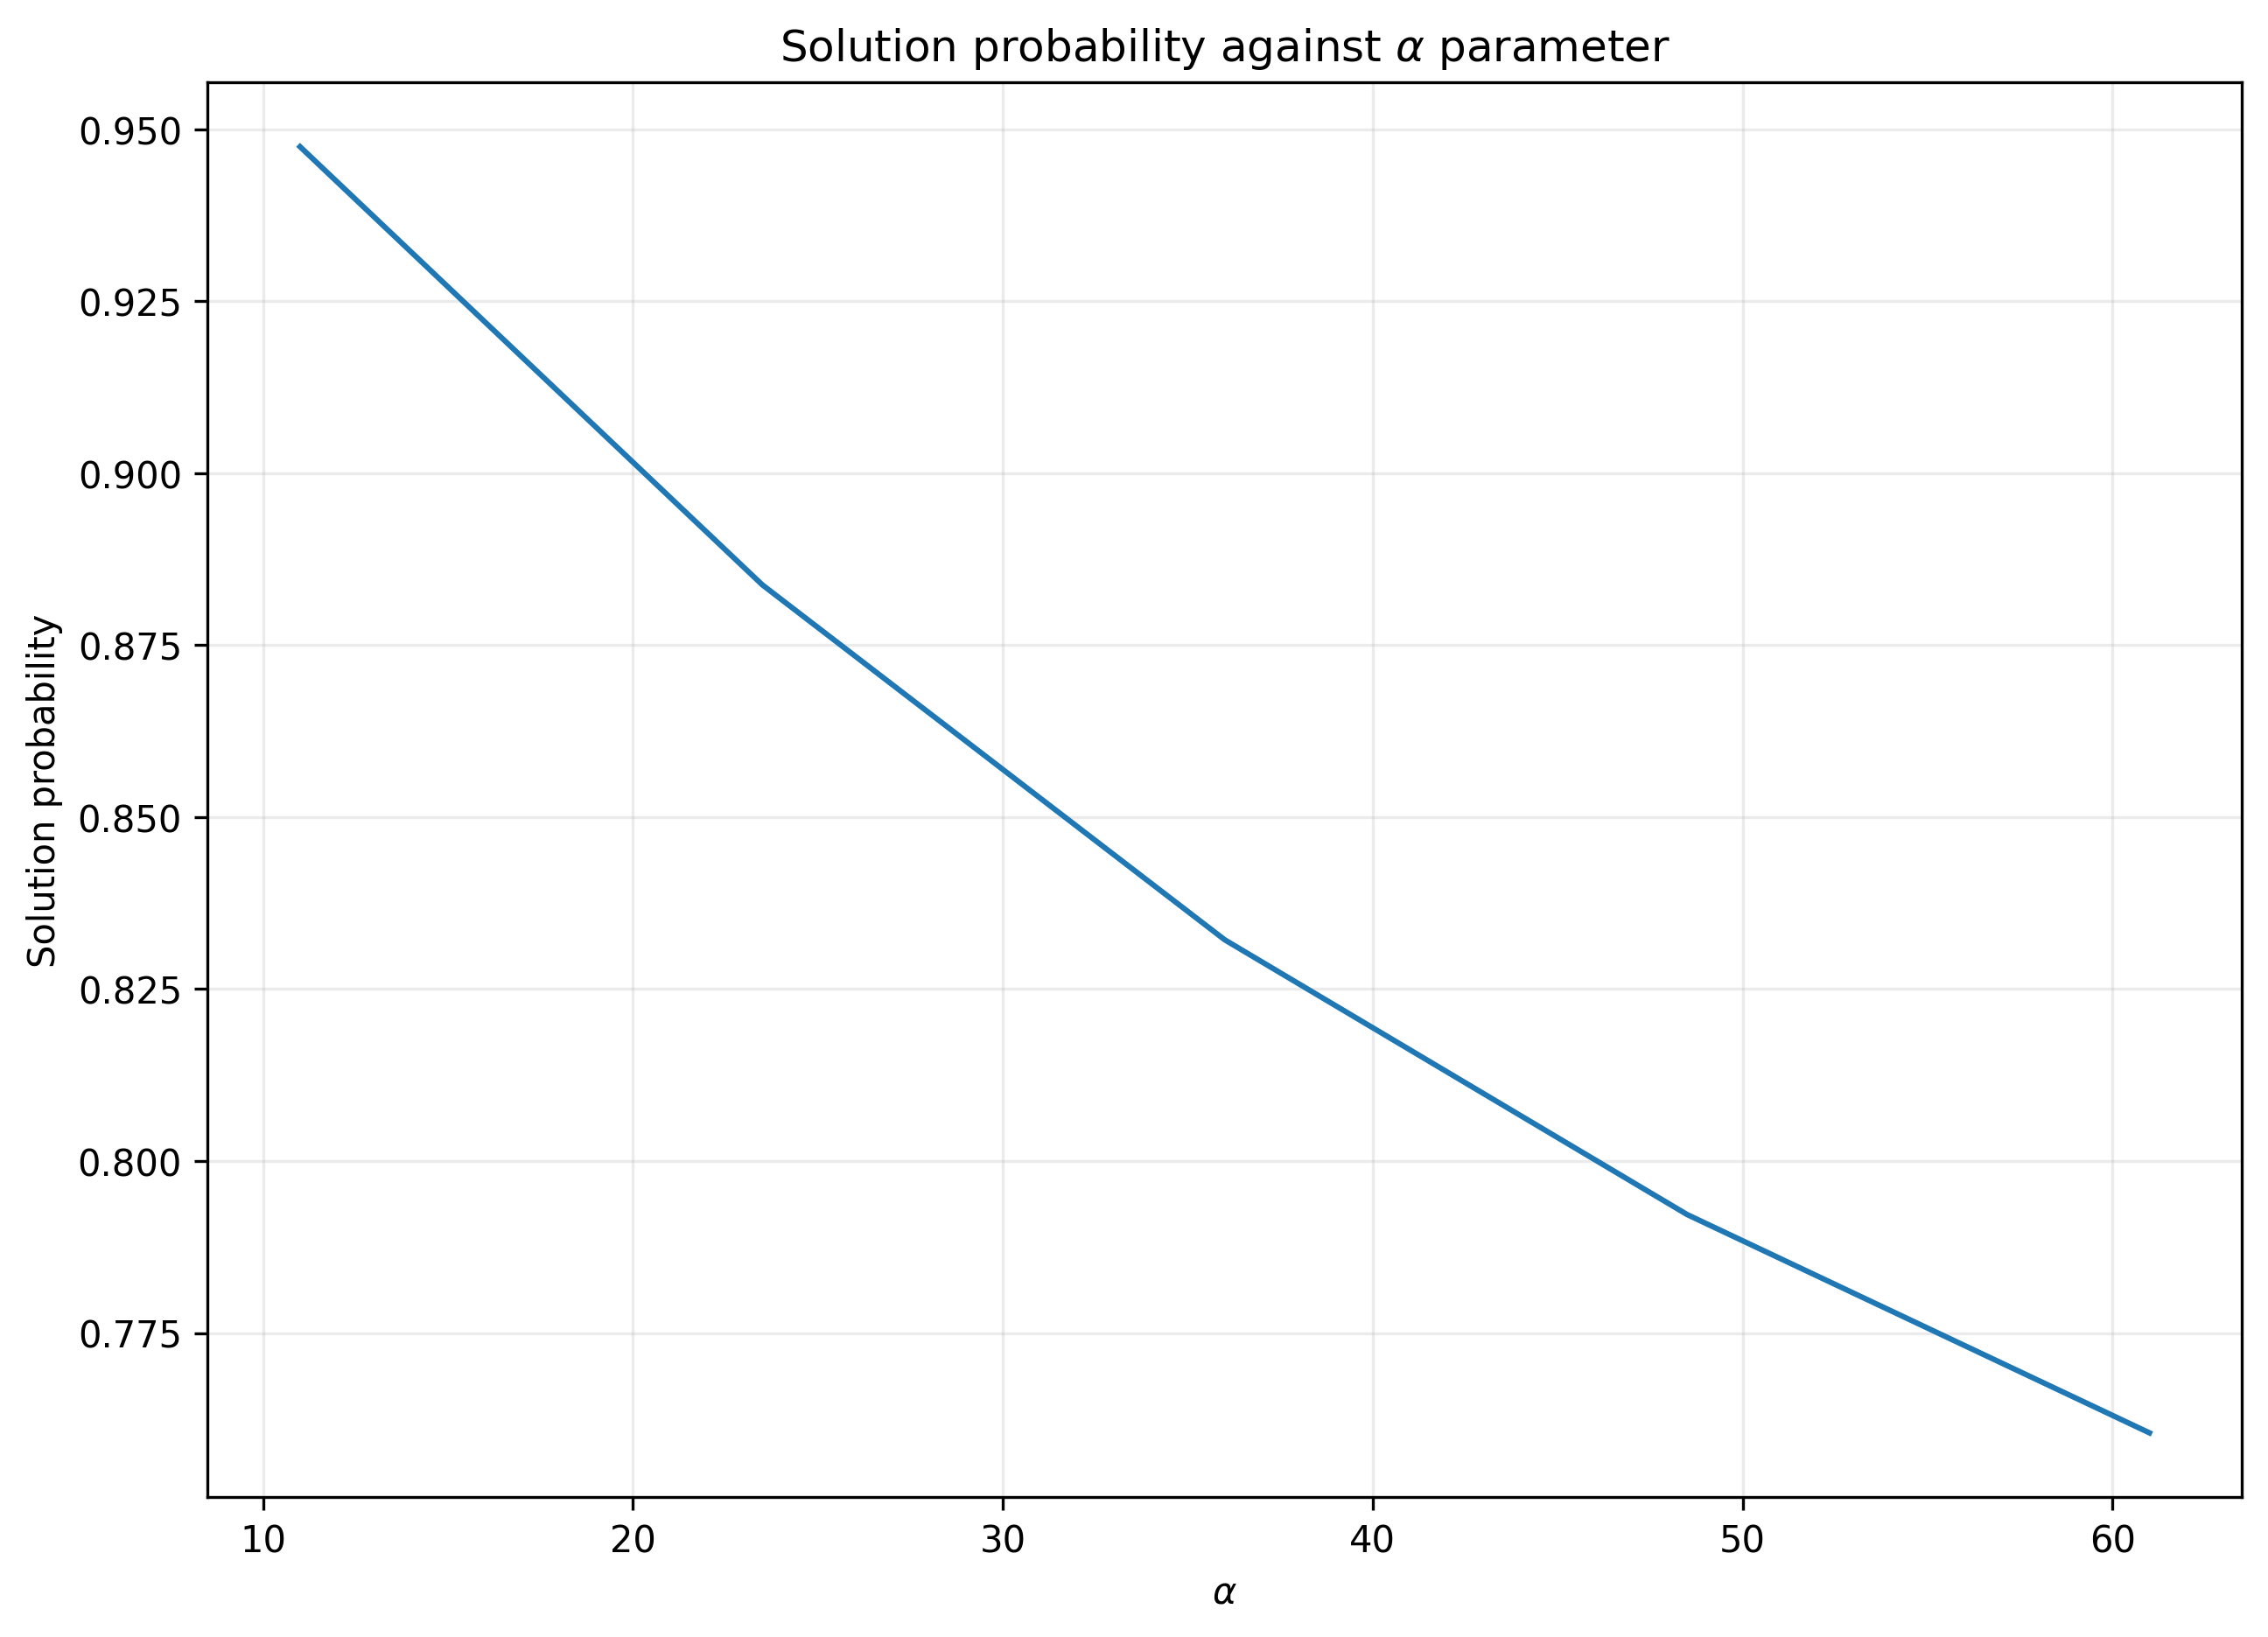

In [ ]:
_, ax = plt.subplots(figsize=(10,7), dpi=300)
ax.plot(alphas, simulated_probs)
ax.set(xlabel=r'$\alpha$', ylabel='Solution probability', title=r'Solution probability against $\alpha$ parameter')
ax.grid(True, alpha=0.25)

plt.show()

In [5]:
ground_state = Observable.get_ground_eigenstate(sim.get_H(1))

basis_system = Basis(sim.get_total_qubits())

probs_lst = []
for idx, state in enumerate(basis_system.get_basis_states()):
    prob = np.power(np.abs(state.dag() * ground_state), 2)
    if prob > 0:
        probs_lst.append(["| " + format(idx, f"0{sim.get_total_qubits()}b") + " >", prob])

print(probs_lst)

[['| 1001 >', np.float64(1.0)]]
